In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras 

We loaded the data with the tf.keras.datasets module from Keras datasets.

In [2]:
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
input_shape = [None, 32, 32, 3]
number_of_classes = 10

y_train = to_categorical(y_train, number_of_classes)
y_test = to_categorical(y_test, number_of_classes)

We printed shape of every training and testing

In [4]:

print("Shape of training features: {}".format(x_train.shape))
print("Shape of training lables: {}".format(y_train.shape))
print("Shape of testing features: {}".format(x_test.shape))
print("Shape of testing lables: {}".format(y_test.shape))



Shape of training features: (50000, 32, 32, 3)
Shape of training lables: (50000, 10)
Shape of testing features: (10000, 32, 32, 3)
Shape of testing lables: (10000, 10)


We showed some images examples from training data

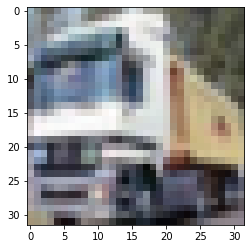

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

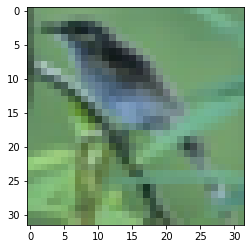

In [6]:
plt.imshow(x_train[800])

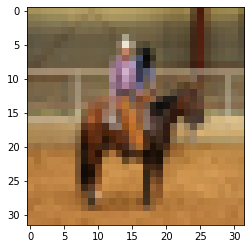

In [7]:
plt.imshow(x_train[3050])

We splitted training data for cross validation.

In [8]:
from sklearn.model_selection import train_test_split
x_train, cv_x, y_train, cv_y = train_test_split(x_train, y_train, 
                                                test_size = 5000, random_state = 42)

print("Number of examples in training set: {}".format(x_train.shape[0]))
print("Number of examples in cross validation set: {}".format(cv_x.shape[0]))

Number of examples in training set: 45000
Number of examples in cross validation set: 5000


All images will be rescaled by /255

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 
x_test /= 255

**Building our network**

Since we need to make more than two classifications, we used softmax activation instead of the sigmoid activation. So we better determined the probability that the input belongs to a particular class.
As the depth of feature maps increases gradually in the network (from 32 to 64), the size of feature maps decreases.
Dense layer is based on a large 512 unit layer followed by the final layer computing the softmax probabilities for each of the 10 categories corresponding to the 10 digits.

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation ='relu',
                 input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation ='relu'))
model.add(Conv2D(64, (3, 3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation ='softmax'))


The dimensions of the feature maps change with every successive layer.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

We used binary crossentropy as our loss.

In [13]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate = 1e-4),
              metrics=['acc'])

We set the epoch and batch size to fit the model. 

In [14]:
history = model.fit(x_train, y_train,
              batch_size=32,
              epochs=30,
              validation_data=(x_test, y_test),
              shuffle=True
        )

Epoch 1/30
1407/1407 [==============================] - 51s 6ms/step - loss: 0.3062 - acc: 0.2581 - val_loss: 0.2443 - val_acc: 0.4311
Epoch 2/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2365 - acc: 0.4528 - val_loss: 0.2210 - val_acc: 0.4859
Epoch 3/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2155 - acc: 0.5125 - val_loss: 0.2090 - val_acc: 0.5214
Epoch 4/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1993 - acc: 0.5613 - val_loss: 0.2066 - val_acc: 0.5408
Epoch 5/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1861 - acc: 0.5981 - val_loss: 0.1894 - val_acc: 0.5899
Epoch 6/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1750 - acc: 0.6264 - val_loss: 0.1818 - val_acc: 0.6087
Epoch 7/30
1407/1407 [==============================] - 8s 5ms/step - loss: 0.1649 - acc: 0.6548 - val_loss: 0.1859 - val_acc: 0.5994
Epoch 8/30
1407/1407 [==============================] - 8s 5m

Let's plot the loss and accuracy of the model over the training and validation data during training:

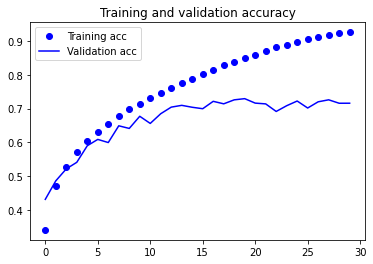

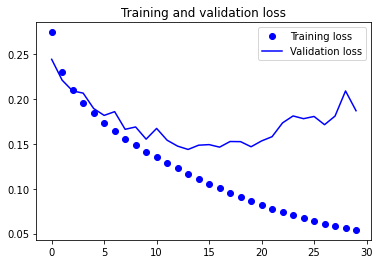

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Our training accuracy increases linearly over time, until it reaches nearly 100%, while our validation accuracy stalls at 70-72%.  While the training loss keeps decreasing linearly until it reaches nearly 0.

In [18]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])



313/313 [==============================] - 1s 3ms/step - loss: 0.1870 - acc: 0.7159
Test loss: 0.18695993721485138
Test accuracy: 0.7159000039100647


In [21]:
#Save the first model
import sys
model_name = 'cifar10_model_1.h5'
# Save the current directory
sys.path.insert(0, 'C:\\Users\\HP\\Desktop\\')
model.save('C:\\Users\\HP\\Desktop\\' + model_name)

We used padding to protect image size. To avoid overfitting, we used data dropout and increased the dropout value.

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation ='relu', padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',activation ='relu'))
model.add(Conv2D(64, (3, 3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation ='softmax'))

The dimensions of the feature maps change with every successive layer.

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

We can either instantiate an optimizer before passing it to model.compile() , as in the example, or we can pass it by its string identifier. 

In [25]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

We set the epoch and batch size to fit the model and we increased the epoch number.

In [26]:
history = model.fit(x_train, y_train,
              batch_size=32,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1407/1407 [==============================] - 9s 5ms/step - loss: 2.0058 - accuracy: 0.2544 - val_loss: 1.5051 - val_accuracy: 0.4435
Epoch 2/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5181 - accuracy: 0.4446 - val_loss: 1.3257 - val_accuracy: 0.5208
Epoch 3/50
1407/1407 [==============================] - 8s 5ms/step - loss: 1.3654 - accuracy: 0.5079 - val_loss: 1.2119 - val_accuracy: 0.5721
Epoch 4/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2824 - accuracy: 0.5461 - val_loss: 1.1359 - val_accuracy: 0.6010
Epoch 5/50
1407/1407 [==============================] - 8s 5ms/step - loss: 1.1905 - accuracy: 0.5757 - val_loss: 1.0814 - val_accuracy: 0.6227
Epoch 6/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1249 - accuracy: 0.6070 - val_loss: 1.0166 - val_accuracy: 0.6471
Epoch 7/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0614 - accuracy: 0.6291 - val_loss: 0.9658 - val_accuracy:

Let's plot the loss and accuracy of the model over the training and validation data during training:

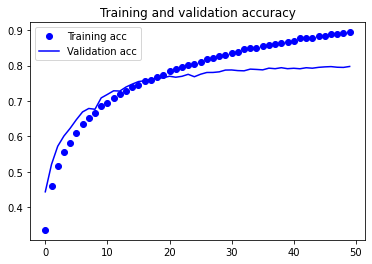

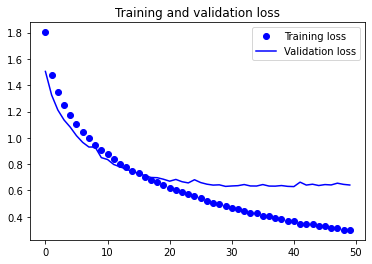

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Thanks to the dropout we used in our second model, our accuracy increased to 0.797, an increase of 11.4% compared to our first model.

In [28]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])



313/313 [==============================] - 1s 3ms/step - loss: 0.6415 - accuracy: 0.7973
Test loss: 0.6415216326713562
Test accuracy: 0.7972999811172485


In [30]:
#Save the second model
import sys
model_name = 'cifar10_model_2.h5'
# Save the current directory
sys.path.insert(0, 'C:\\Users\\HP\\Desktop\\')
model.save('C:\\Users\\HP\\Desktop\\' + model_name)